<a href="https://colab.research.google.com/github/Bioprotocols/paml/blob/HARMONY22/notebooks/paml_author_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## This cell doesn't need to run as long as the runtime is intact.

!pip uninstall -y pypaml                                   # remove old package
#!pip install pypaml                                       # pypi version
!pip install git+https://github.com/Bioprotocols/paml.git  # Using source version, not pypi
!pip install -U distributed                                # Required by Collab

  Cloning https://github.com/Bioprotocols/paml.git to /tmp/pip-req-build-r58ya171
  Running command git clone -q https://github.com/Bioprotocols/paml.git /tmp/pip-req-build-r58ya171
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 238 kB 24.2 MB/s 
     |████████████████████████████████| 810 kB 55.8 MB/s 
     |████████████████████████████████| 136 kB 70.5 MB/s 
     |████████████████████████████████| 72 kB 704 kB/s 
     |████████████████████████████████| 195 kB 67.3 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 482 kB 53.4 MB/s 
     |████████████████████████████████| 71 kB 160 kB/s 
     |████████████████████████████████| 1.2 MB 51.0 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 41 kB 523 kB/s 
     |████████████████████████████████| 1.2 MB 57.0 MB/s 
     |█████████

     |████████████████████████████████| 830 kB 21.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.0 MB/s 
     |████████████████████████████████| 133 kB 57.9 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


In [ ]:
import os
import tempfile
import sbol3
import paml
import tyto
import uml
import json
import rdflib as rdfl
from IPython.display import Markdown


from paml.execution_engine import ExecutionEngine
# from paml_check.paml_check import check_doc
from paml_convert.markdown.markdown_specialization import MarkdownSpecialization

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.7/dist-packages/rdflib_jsonld/__init__.py:12: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  DeprecationWarning,


In [ ]:
#############################################
# set up the document
print('Setting up document')
doc = sbol3.Document()
sbol3.set_namespace('https://bbn.com/scratch/')

#############################################
# Import the primitive libraries
print('Importing libraries')
paml.import_library('liquid_handling')
print('... Imported liquid handling')
paml.import_library('plate_handling')
print('... Imported plate handling')
paml.import_library('spectrophotometry')
print('... Imported spectrophotometry')
paml.import_library('sample_arrays')
print('... Imported sample arrays')

Setting up document
Importing libraries
... Imported liquid handling
... Imported plate handling
... Imported spectrophotometry
... Imported sample arrays


In [ ]:
# Print descriptions of the primitives avaiable in each library

dashes = "-" * 80
print(dashes)
primitives = {}
for lib, lib_doc in paml.loaded_libraries.items():
    print(f"{dashes}\nlibrary: {lib}")
    for primitive in lib_doc.objects:
        primitives[str(primitive.identity)] = primitive
        print(primitive)
    print(dashes)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
library: liquid_handling

Primitive: https://bioprotocols.org/paml/primitives/liquid_handling/Dispense
Input Parameters:
	source: http://bioprotocols.org/paml#SampleCollection 
	amount: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure 
	destination: http://bioprotocols.org/paml#SampleCollection 
	dispenseVelocity: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure (Optional) 

            

Primitive: https://bioprotocols.org/paml/primitives/liquid_handling/PipetteMix
Input Parameters:
	amount: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure 
	samples: http://bioprotocols.org/paml#SampleCollection 
	dispenseVelocity: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure (Optional) 
	cycleCount: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure (Optio

In [ ]:
protocol = paml.Protocol('iGEM_LUDOX_OD_calibration_2018')
protocol.name = "iGEM 2018 LUDOX OD calibration protocol"
protocol.description = '''
With this protocol you will use LUDOX CL-X (a 45% colloidal silica suspension) as a single point reference to
obtain a conversion factor to transform absorbance (OD600) data from your plate reader into a comparable
OD600 measurement as would be obtained in a spectrophotometer. This conversion is necessary because plate
reader measurements of absorbance are volume dependent; the depth of the fluid in the well defines the path
length of the light passing through the sample, which can vary slightly from well to well. In a standard
spectrophotometer, the path length is fixed and is defined by the width of the cuvette, which is constant.
Therefore this conversion calculation can transform OD600 measurements from a plate reader (i.e. absorbance
at 600 nm, the basic output of most instruments) into comparable OD600 measurements. The LUDOX solution
is only weakly scattering and so will give a low absorbance value.
'''
doc.add(protocol)

wavelength: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure  <OrderedPropertyValue None>
(<class 'sbol_factory.sbol_factory.OrderedPropertyValue'>, <class 'sbol3.custom.CustomIdentified'>, <class 'sbol3.identified.Identified'>, <class 'sbol3.object.SBOLObject'>, <class 'object'>)


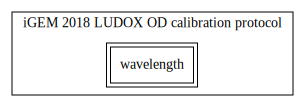

In [ ]:
# Add an optional parameter for specifying the wavelength
wavelength_param = protocol.input_value(
    'wavelength', sbol3.OM_MEASURE, optional=True,
    default_value=sbol3.Measure(600, tyto.OM.nanometer))

protocol.to_dot()

In [ ]:
# create the materials to be provisioned
ddh2o = sbol3.Component('ddH2O', 'https://identifiers.org/pubchem.substance:24901740')
ddh2o.name = 'Water, sterile-filtered, BioReagent, suitable for cell culture'  
doc.add(ddh2o)

ludox = sbol3.Component('LUDOX', 'https://identifiers.org/pubchem.substance:24866361')
ludox.name = 'LUDOX(R) CL-X colloidal silica, 45 wt. % suspension in H2O'
doc.add(ludox)

In [ ]:
# specify the type of plate to use

PLATE_SPECIFICATION = \
    """cont:ClearPlate and 
 cont:SLAS-4-2004 and
 (cont:wellVolume some 
    ((om:hasUnit value om:microlitre) and
     (om:hasNumericalValue only xsd:decimal[>= "200"^^xsd:decimal])))"""

CONT_NS = rdfl.Namespace('https://sift.net/container-ontology/container-ontology#')
OM_NS = rdfl.Namespace('http://www.ontology-of-units-of-measure.org/resource/om-2/')

PREFIX_MAP = json.dumps({"cont": CONT_NS, "om": OM_NS})

spec = paml.ContainerSpec(queryString=PLATE_SPECIFICATION, prefixMap=PREFIX_MAP, name='plateRequirement')

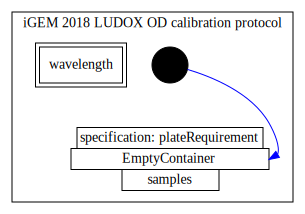

In [ ]:
# actual steps of the protocol
# get a plate
plate = protocol.primitive_step('EmptyContainer', specification=spec)

protocol.to_dot()

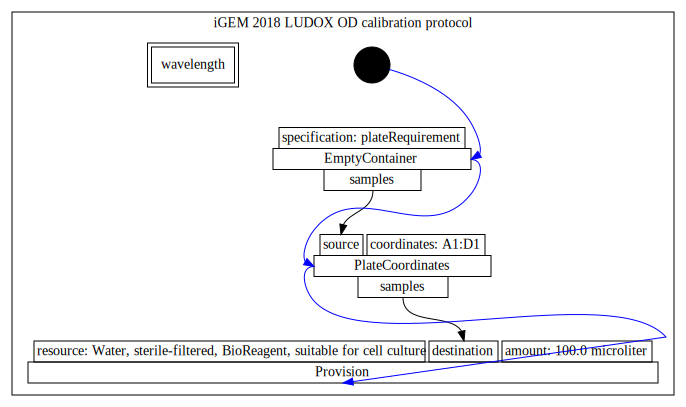

In [ ]:
# identify wells to use
c_ddh2o = protocol.primitive_step(
    'PlateCoordinates', source=plate.output_pin('samples'), coordinates='A1:D1')

# put water in selected wells
provision_ddh2o = protocol.primitive_step(
    'Provision', resource=ddh2o, destination=c_ddh2o.output_pin('samples'),
    amount=sbol3.Measure(100, tyto.OM.microliter))

protocol.to_dot()

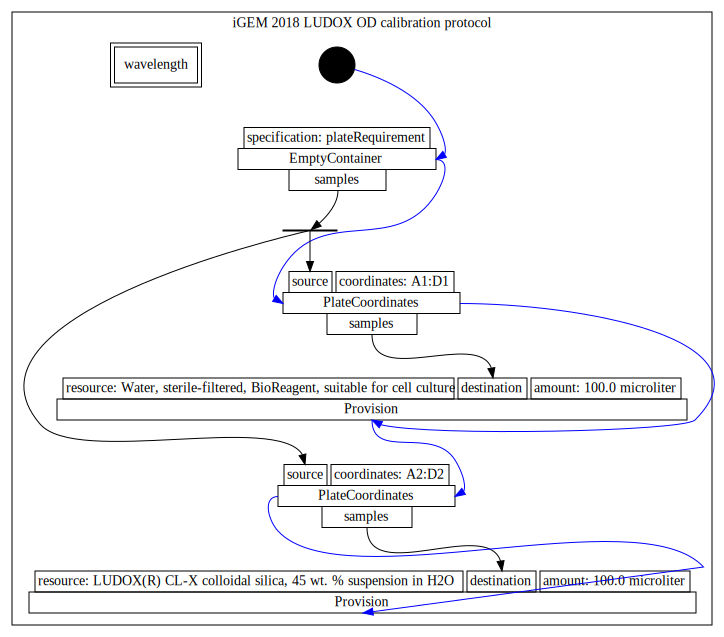

In [ ]:
#identify wells to use
c_ludox = protocol.primitive_step(
    'PlateCoordinates', source=plate.output_pin('samples'), coordinates='A2:D2')

# put ludox in selected wells
provision_ludox = protocol.primitive_step(
    'Provision', resource=ludox, destination=c_ludox.output_pin('samples'),
    amount=sbol3.Measure(100, tyto.OM.microliter))

protocol.to_dot()

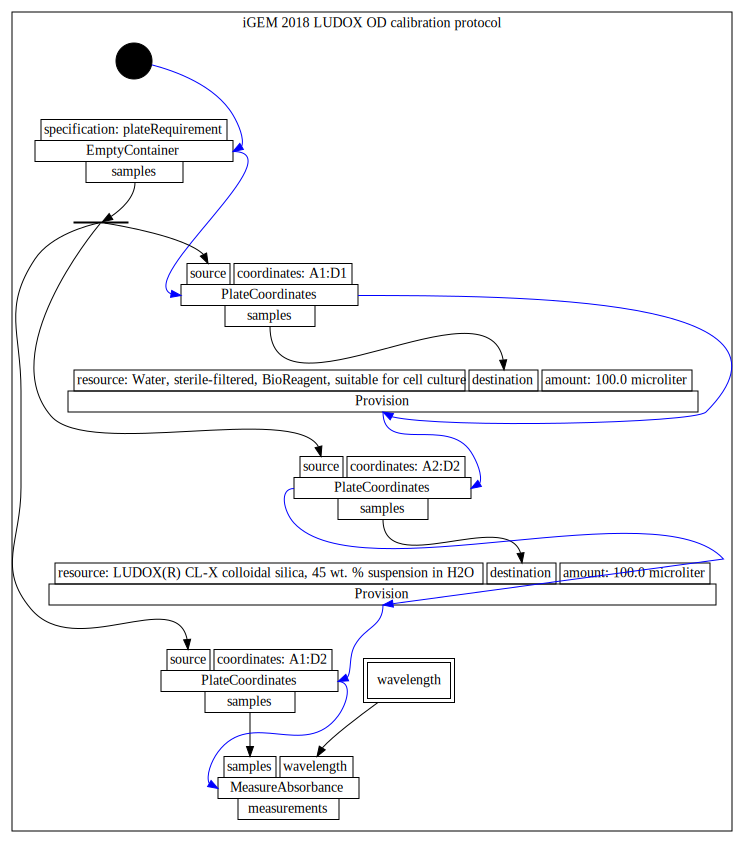

In [ ]:
# identify wells to use
c_measure = protocol.primitive_step(
    'PlateCoordinates', source=plate.output_pin('samples'), coordinates='A1:D2')

# measure the absorbance
measure = protocol.primitive_step(
    'MeasureAbsorbance', samples=c_measure.output_pin('samples'))

# link input parameter to measure primitive input
protocol.use_value(wavelength_param, measure.input_pin('wavelength'))

protocol.to_dot()

absorbance: http://www.ontology-of-units-of-measure.org/resource/om-2/Measure  <OrderedPropertyValue None>
(<class 'sbol_factory.sbol_factory.OrderedPropertyValue'>, <class 'sbol3.custom.CustomIdentified'>, <class 'sbol3.identified.Identified'>, <class 'sbol3.object.SBOLObject'>, <class 'object'>)


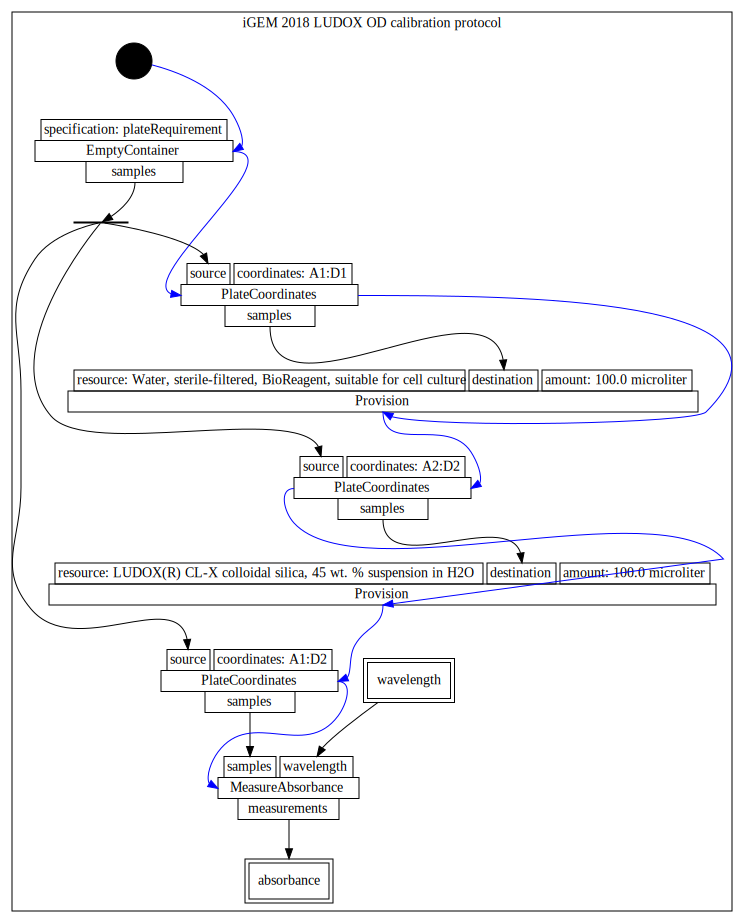

In [ ]:
# link measurement output to protocol output
output = protocol.designate_output(
    'absorbance', sbol3.OM_MEASURE, measure.output_pin('measurements'))

# add control flow from last step to output
#protocol.order(protocol.get_last_step(), output)

protocol.to_dot()

In [ ]:
import paml_time as pamlt

# protocol starts at time 0
protocol_start_time = pamlt.startTime(protocol, 0, units=tyto.OM.hour)

# Provisioning requires 60s
provision_ludox_duration = pamlt.duration(provision_ludox, 60, units=tyto.OM.second)
provision_ddh2o_duration = pamlt.duration(provision_ddh2o, 60, units=tyto.OM.second)

# Measurement requires 2m
execute_measurement_duration = pamlt.duration(measure, 2, units=tyto.OM.minute)

# Provisioning ddh2o precedes provisioning ludox by at most 60s
ddh2o_before_ludox_constraint = pamlt.precedes(provision_ddh2o, [0, 60], 
                                               provision_ludox, units=tyto.OM.second)

# Coonstraints are combined via Boolean logic
time_constraints = pamlt.TimeConstraints("ludox_protocol_constraints",
    constraints=[pamlt.And([
        protocol_start_time,
        provision_ludox_duration,
        provision_ddh2o_duration,
        execute_measurement_duration,
        ddh2o_before_ludox_constraint
        ])],
    protocols = [protocol]
)

doc.add(time_constraints)

In [ ]:
# Compute a Schedule for the protocol and get the constraint graph
# schedule, graph = check_doc(doc)
# schedule.plot()

In [ ]:
# Get minimum duration for the protocol (in seconds)
# min_protocol_durations = graph.get_minimum_duration()
# min_str = "\n".join([f"The minimum duration of {protocol} is {result['duration']}s " \
#                      for protocol, result in min_protocol_durations.items()])
# print(min_str) 

<generator object behavior_get_input.<locals>.<genexpr> at 0x7f41f6e8bb50>


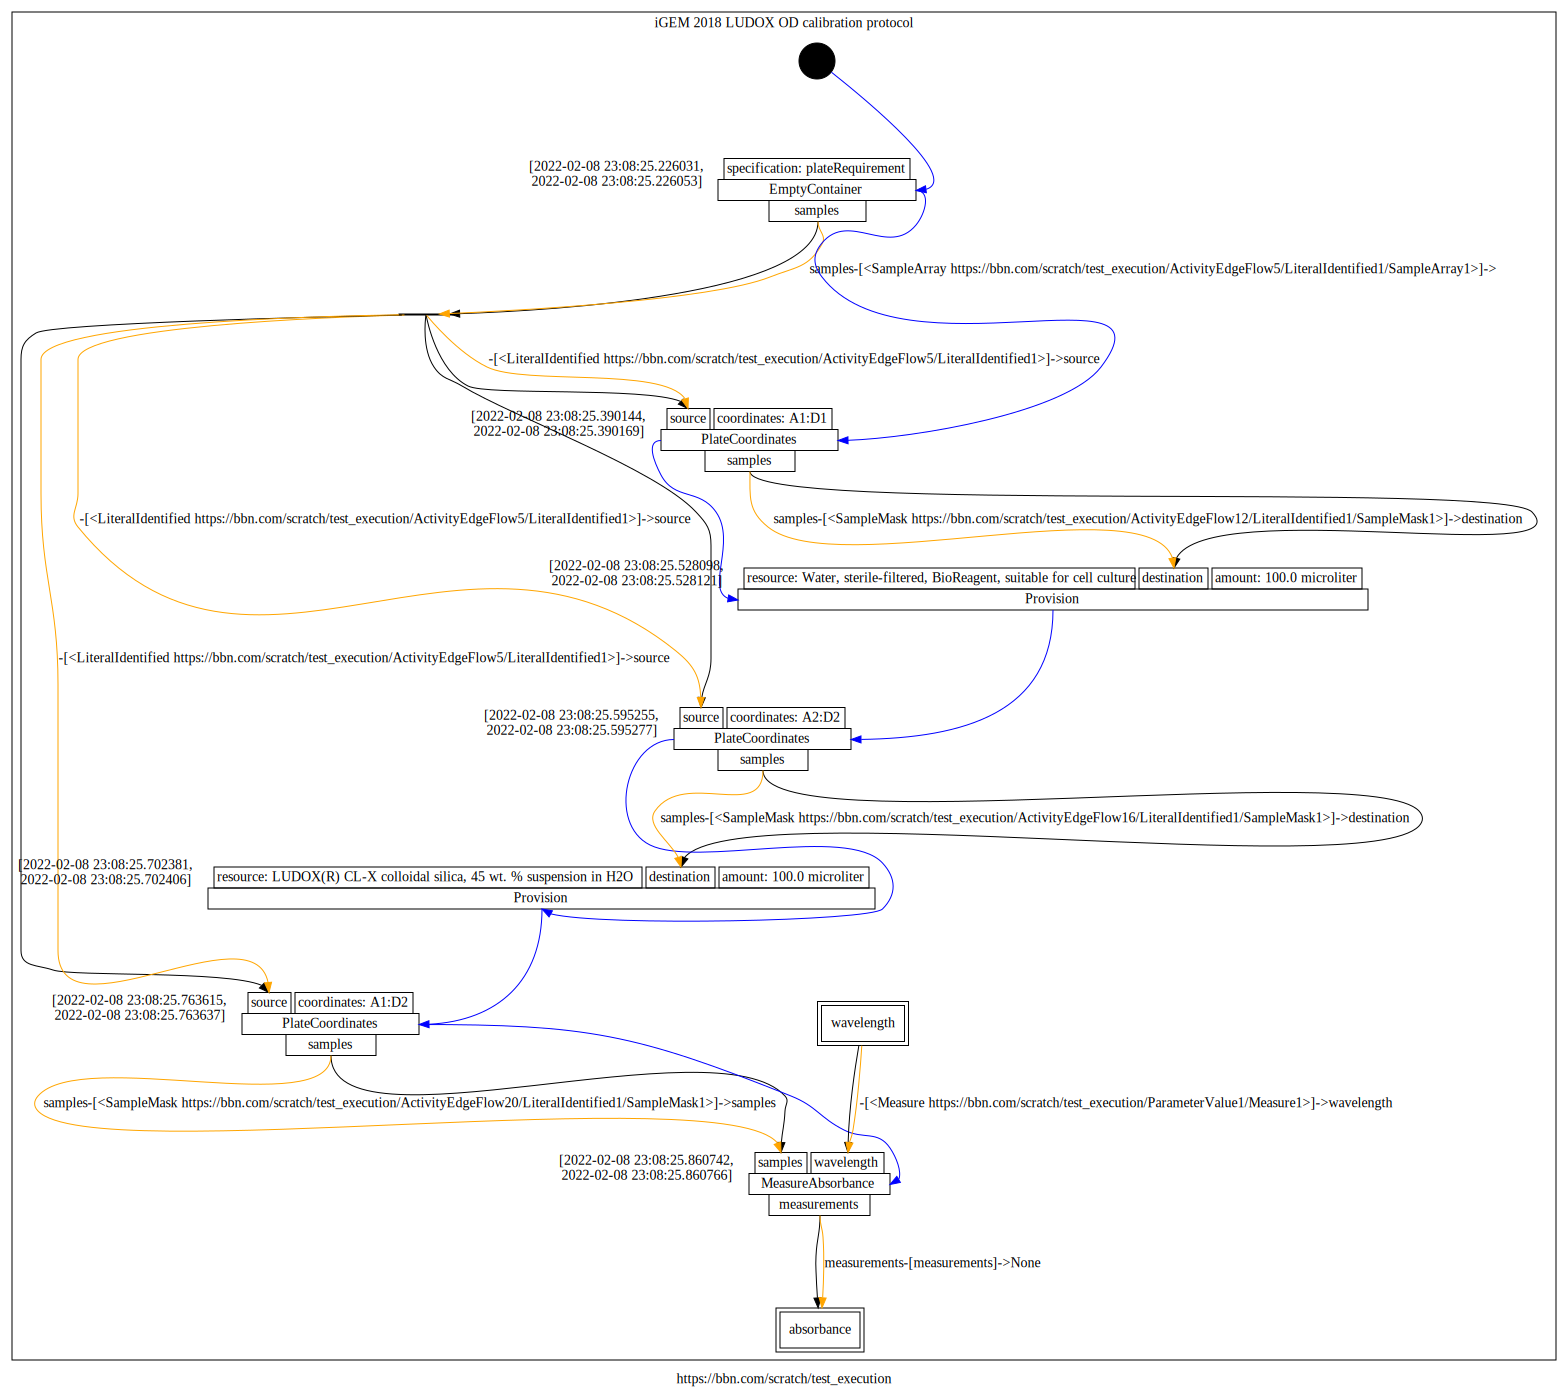

In [ ]:
# Simulate Execution of the Protocol

agent = sbol3.Agent("test_agent")
ee = ExecutionEngine(specializations=[MarkdownSpecialization("test_LUDOX_markdown.md")])
parameter_values = [
    paml.ParameterValue(parameter=protocol.get_input("wavelength"), 
                        value=sbol3.Measure(100, tyto.OM.nanometer))
]
execution = ee.execute(protocol, agent, id="test_execution", parameter_values=parameter_values)
execution.to_dot()

In [ ]:
Markdown(ee.specializations[0].markdown)

# iGEM 2018 LUDOX OD calibration protocol

## Description:

With this protocol you will use LUDOX CL-X (a 45% colloidal silica suspension) as a single point reference to
obtain a conversion factor to transform absorbance (OD600) data from your plate reader into a comparable
OD600 measurement as would be obtained in a spectrophotometer. This conversion is necessary because plate
reader measurements of absorbance are volume dependent; the depth of the fluid in the well defines the path
length of the light passing through the sample, which can vary slightly from well to well. In a standard
spectrophotometer, the path length is fixed and is defined by the width of the cuvette, which is constant.
Therefore this conversion calculation can transform OD600 measurements from a plate reader (i.e. absorbance
at 600 nm, the basic output of most instruments) into comparable OD600 measurements. The LUDOX solution
is only weakly scattering and so will give a low absorbance value.



## Protocol Materials:
* [Water, sterile-filtered, BioReagent, suitable for cell culture](https://identifiers.org/pubchem.substance:24901740)
* [LUDOX(R) CL-X colloidal silica, 45 wt. % suspension in H2O](https://identifiers.org/pubchem.substance:24866361)


## Protocol Inputs:
* `wavelength` = 100.0

## Protocol Outputs:
* `absorbance`

## Steps
1. Provision a container named `samples` meeting specification: cont:ClearPlate and 
 cont:SLAS-4-2004 and
 (cont:wellVolume some 
    ((om:hasUnit value om:microlitre) and
     (om:hasNumericalValue only xsd:decimal[>= "200"^^xsd:decimal]))).
2. Pipette 100.0 microliter of [Water, sterile-filtered, BioReagent, suitable for cell culture](https://identifiers.org/pubchem.substance:24901740) into `samples(A1:D1)`.
3. Pipette 100.0 microliter of [LUDOX(R) CL-X colloidal silica, 45 wt. % suspension in H2O](https://identifiers.org/pubchem.substance:24866361) into `samples(A2:D2)`.
4. Make absorbance measurements (named `measurements`) of `samples(A1:D2)` at 100.0 nanometer.
5. Report values for `absorbance` from `measurements`.


In [ ]:
assert(True)